# Restaurant Dataset
## Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.tools.eval_measures import rmspe, rmse
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima_process import ArmaProcess
from pmdarima.arima import CHTest
from pmdarima.arima import nsdiffs


import warnings
warnings.filterwarnings('ignore')

# Dataset

In [3]:
# Load dataset
path = ('https://raw.githubusercontent.com/KCkapaj/Exogenous-Variables-SARIMAX/refs/heads/main/RestaurantVisitors.csv')
df = pd.read_csv(path,index_col='date',parse_dates=True)
df.index.freq = 'D'

df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [4]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna()
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [6]:
# Change the dtype of selected columns
cols = ['rest1','rest2','rest3','rest4','total']

for col in cols:
    df[col] = df[col].astype(int)
    
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91
2017-04-19,Wednesday,0,na,20,11,30,18,79
2017-04-20,Thursday,0,na,22,3,19,46,90


In [7]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30,30,13,18,91
2017-04-19,Wednesday,0,na,20,11,30,18,79
2017-04-20,Thursday,0,na,22,3,19,46,90
2017-04-21,Friday,0,na,38,53,36,38,165
2017-04-22,Saturday,0,na,97,20,50,59,226


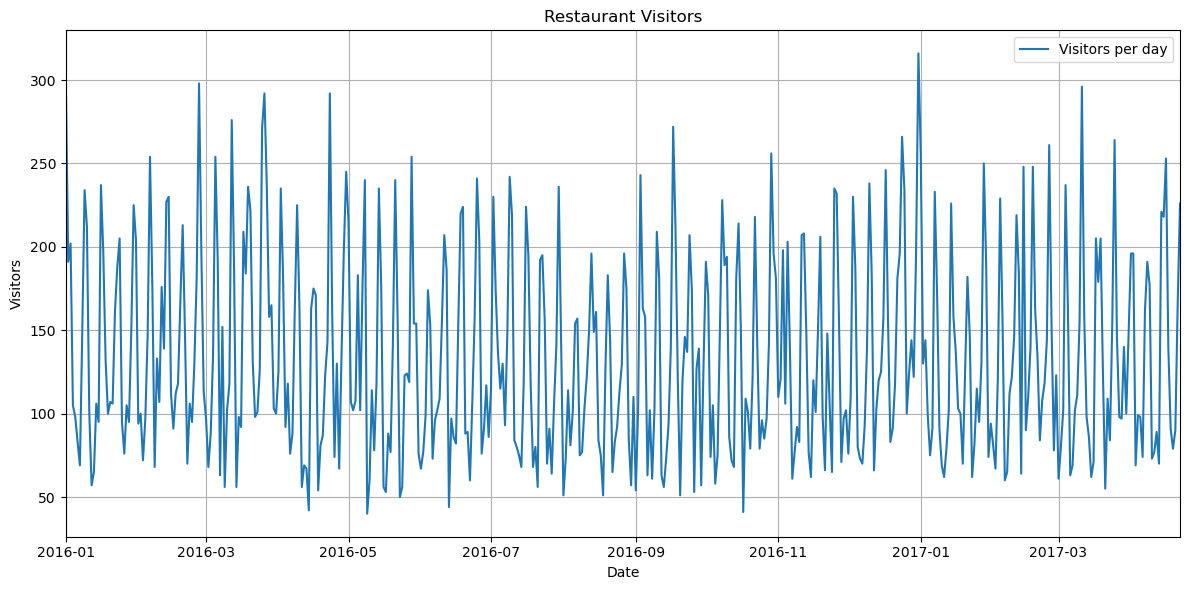

In [8]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['total'], label='Visitors per day')     

plt.title('Restaurant Visitors')                      
plt.xlabel('Date')                                        
plt.ylabel('Visitors')  
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2017-04-22'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show();

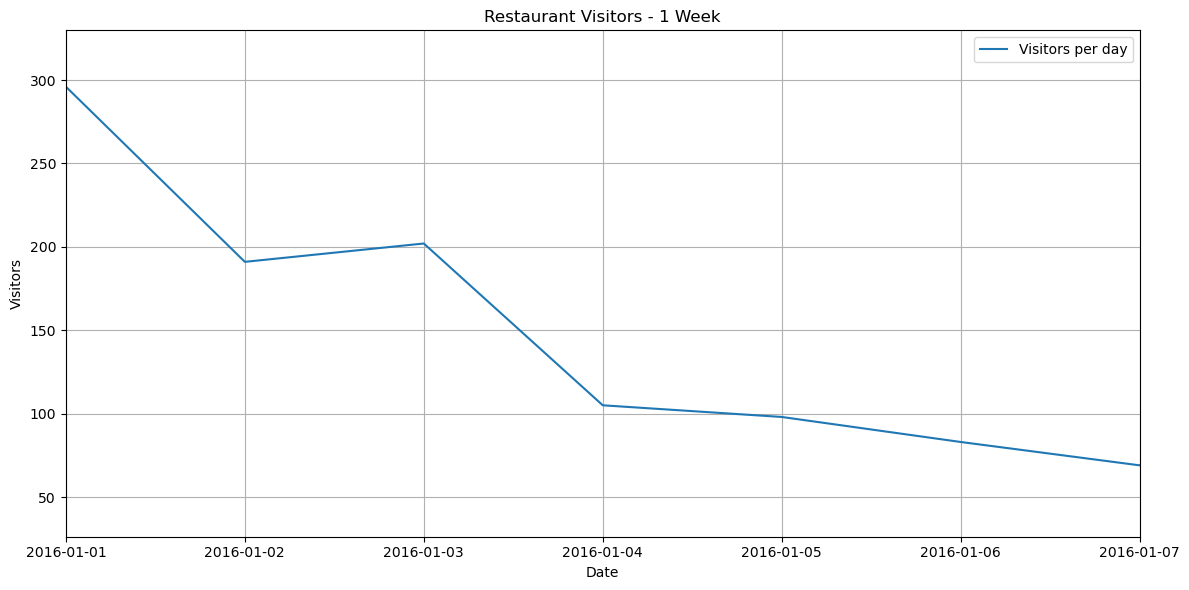

In [9]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['total'], label='Visitors per day')     

plt.title('Restaurant Visitors - 1 Week')                      
plt.xlabel('Date')                                        
plt.ylabel('Visitors')  
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2016-01-07'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show();

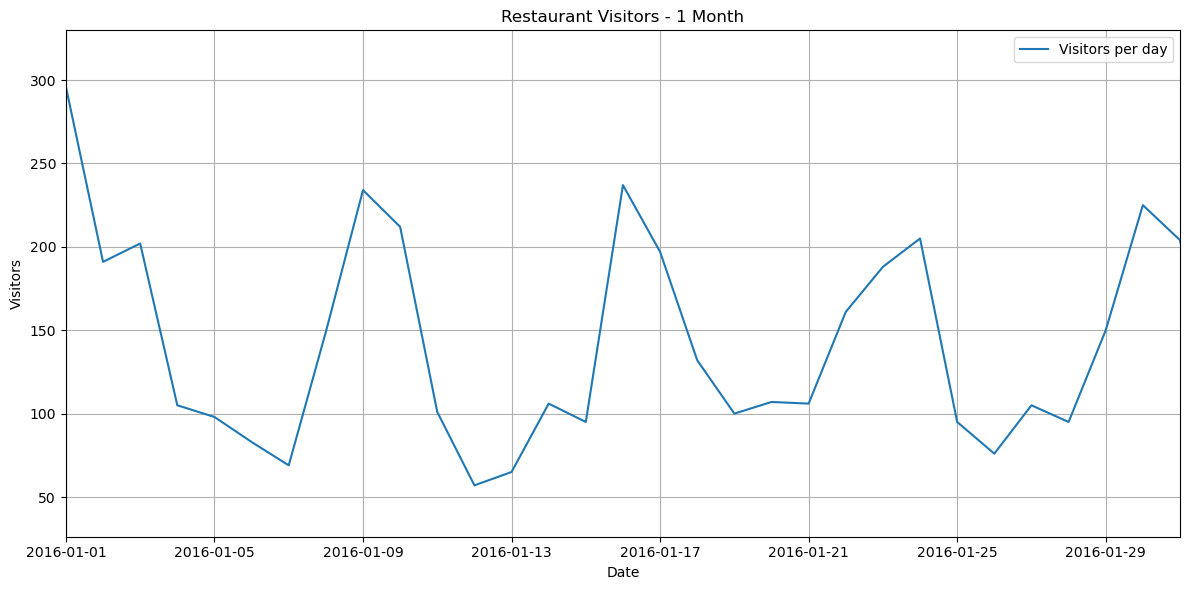

In [10]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['total'], label='Visitors per day')     

plt.title('Restaurant Visitors - 1 Month')                      
plt.xlabel('Date')                                        
plt.ylabel('Visitors')  
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2016-01-31'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show();

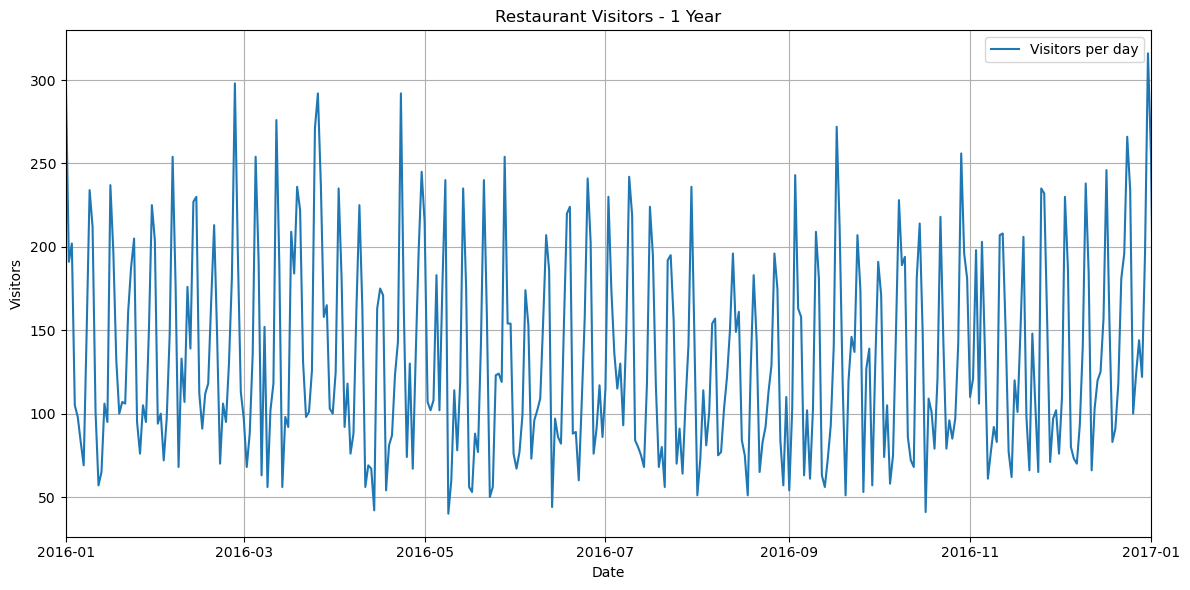

In [11]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['total'], label='Visitors per day')     

plt.title('Restaurant Visitors - 1 Year')                      
plt.xlabel('Date')                                        
plt.ylabel('Visitors')  
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2017-01-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show();

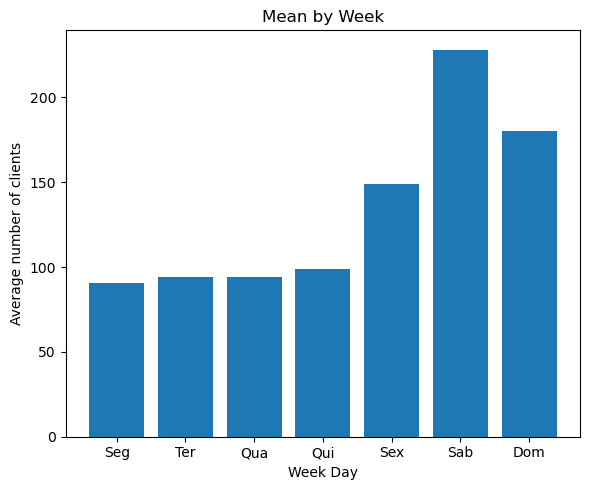

In [12]:
# Nome dos dias
dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']

# Agrupa e plota com nomes dos dias
df['weekday'] = df.index.dayofweek
media_por_dia = df.groupby('weekday')['total'].mean()

plt.figure(figsize=(6,5))
plt.bar(dias, media_por_dia)
plt.title('Mean by Week')
plt.xlabel('Week Day')
plt.ylabel('Average number of clients')
plt.tight_layout()
plt.show()

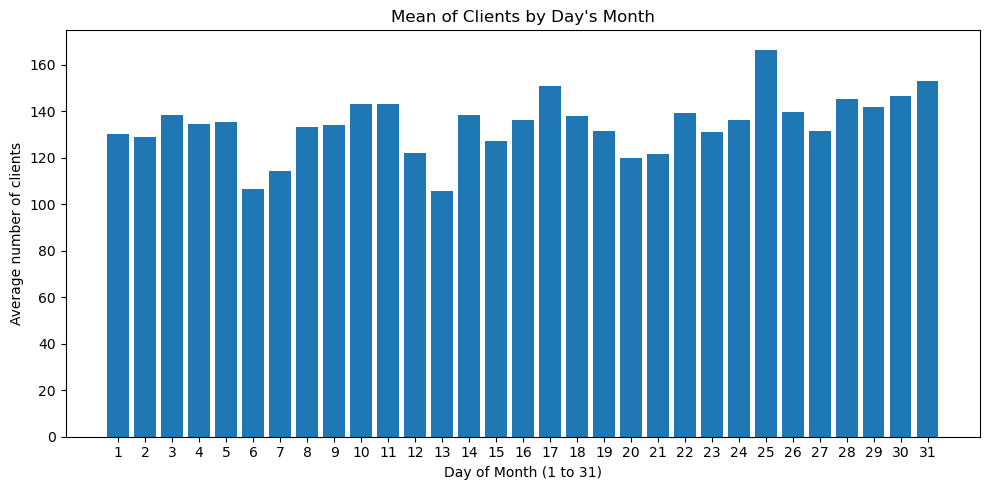

In [13]:
# Cria uma nova coluna com o dia do mês (1 a 31)
df['day_of_month'] = df.index.day

# Agrupa a média de clientes por dia do mês
media_por_dia_mes = df.groupby('day_of_month')['total'].mean()

# Plota o gráfico
plt.figure(figsize=(10,5))
plt.bar(media_por_dia_mes.index, media_por_dia_mes.values)
plt.title("Mean of Clients by Day's Month")
plt.xlabel('Day of Month (1 to 31)')
plt.ylabel('Average number of clients')
plt.xticks(range(1, 32))  # Marca todos os dias do mês no eixo x
plt.tight_layout()
plt.show()

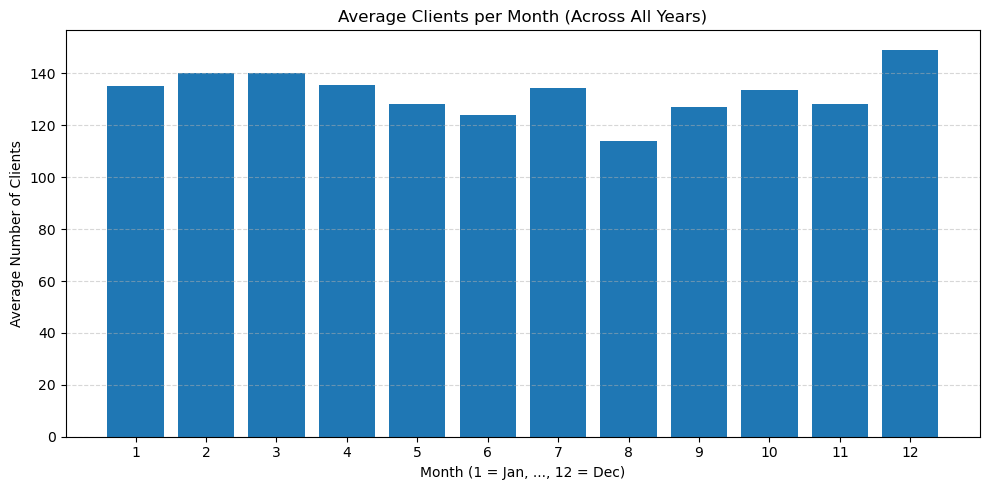

In [14]:
# Extract month from the datetime index
df['month'] = df.index.month

# Group by month to calculate the average number of clients
media_por_mes = df.groupby('month')['total'].mean()

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(media_por_mes.index, media_por_mes.values)
plt.title('Average Clients per Month (Across All Years)')
plt.xlabel('Month (1 = Jan, ..., 12 = Dec)')
plt.ylabel('Average Number of Clients')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

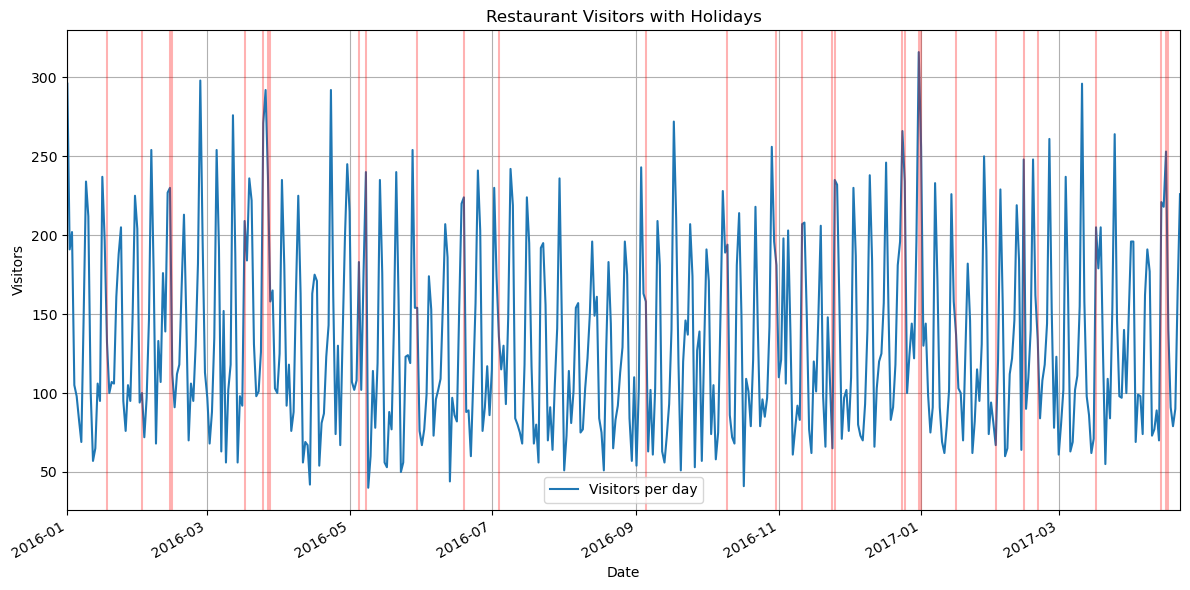

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df['total'], label='Visitors per day')  

for x in df.query('holiday==1').index:       # for days where holiday == 1
    ax.axvline(x=x, color='r', alpha = 0.3);  # add a semi-transparent grey line

ax.set_xlabel('Date')
ax.set_ylabel('Visitors')
ax.set_title('Restaurant Visitors with Holidays')
ax.set_xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2017-04-22'))
ax.grid(True)  
ax.legend()

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [16]:
# Convert to datetime for the comparison
train = df[df.index < pd.to_datetime('2017-03-12')]     # All data before March
test = df[df.index >= pd.to_datetime('2017-03-12')]     # All data in March and beyond

# Show the results
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print()
train.tail(), print(), test.head()

Train shape: (436, 10)
Test shape: (42, 10)




(            weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total  \
 date                                                                           
 2017-03-07        1        0           na     28      9     19     13     69   
 2017-03-08        2        0           na     27     19     35     21    102   
 2017-03-09        3        0           na     63     22     13     13    111   
 2017-03-10        4        0           na     38     53     32     32    155   
 2017-03-11        5        0           na    128     29     80     59    296   
 
             day_of_month  month  
 date                             
 2017-03-07             7      3  
 2017-03-08             8      3  
 2017-03-09             9      3  
 2017-03-10            10      3  
 2017-03-11            11      3  ,
 None,
             weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total  \
 date                                                                           
 2017-03-12     

In [17]:
restaurant_series = train['total']

In [18]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(restaurant_series)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -5.3577680118840085
p-value: 4.152288703552297e-06

p-value < alpha; Ha: Stationary


In [19]:
def determine_nonseasonal_d(series, max_d=2, alpha=0.05):

    d = 0

    adf_result = adfuller(series)                # Run ADF test on the original series
    p_value = adf_result[1]
    print(f"d = {d} | ADF Statistic = {adf_result[0]:.4f}, p-value = {p_value:.4f}")

    if p_value < alpha:                          # If the original series is stationary
        
        return d
        
    else:
        while p_value > alpha and d < max_d:
            d += 1
            series = np.diff(series, n=1)        # Perform first-order differencing
            ad_fuller_result1 = adfuller(series)  
            p_value = ad_fuller_result1[1]
            print(f"d = {d} | ADF Statistic = {ad_fuller_result1[0]:.4f}, p-value = {p_value:.4f}")   
            
        return d  

d = determine_nonseasonal_d(restaurant_series)
print(f"\nNon-seasonal differencing term (d): {d}")

d = 0 | ADF Statistic = -5.3578, p-value = 0.0000

Non-seasonal differencing term (d): 0


In [20]:
from pmdarima.arima import nsdiffs

def determine_seasonal_D(series, m=12):
    
    # Get seasonal differencing terms using CH and OCSB tests
    D_ch = nsdiffs(series, m=m, test='ch')
    D_ocsb = nsdiffs(series, m=m, test='ocsb')

    if D_ch == D_ocsb:
        D = D_ch
        return D
        
    else:
        print(f'CH Test: D = {D_ch}, OCSB Test: D = {D_ocsb}')
        D = D_ch
        return D

for m in  [4, 7, 12, 24, 30, 52]:

    D = determine_seasonal_D(restaurant_series, m)
    print(f'Seasonal differencing term (D) for {m}: {D}')

Seasonal differencing term (D) for 4: 0
Seasonal differencing term (D) for 7: 0
Seasonal differencing term (D) for 12: 0
Seasonal differencing term (D) for 24: 0
Seasonal differencing term (D) for 30: 0
Seasonal differencing term (D) for 52: 0


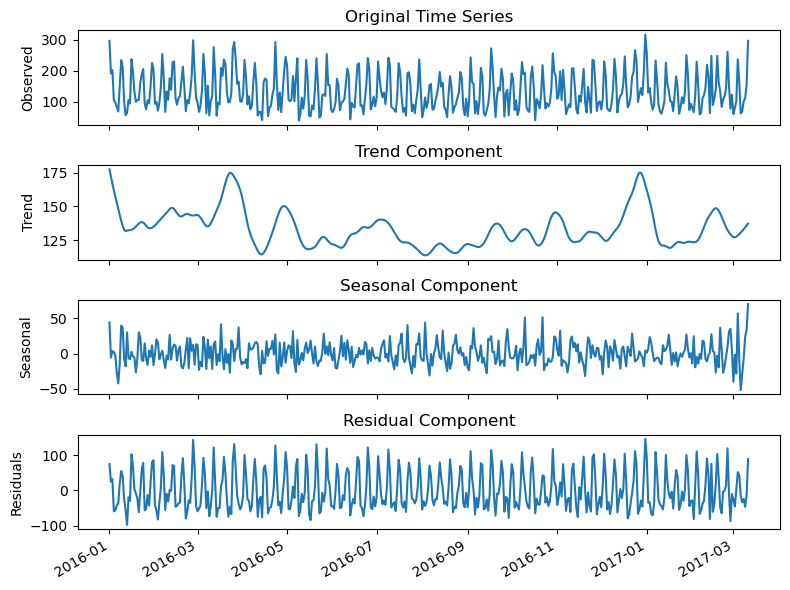

In [21]:
decom_restaurant = STL(restaurant_series, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8,6))

ax1.plot(decom_restaurant.observed)
ax1.set_ylabel('Observed')
ax1.set_title("Original Time Series")

ax2.plot(decom_restaurant.trend)
ax2.set_ylabel('Trend')
ax2.set_title("Trend Component")

ax3.plot(decom_restaurant.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_title("Seasonal Component")

ax4.plot(decom_restaurant.resid)
ax4.set_ylabel('Residuals')
ax4.set_title("Residual Component")

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

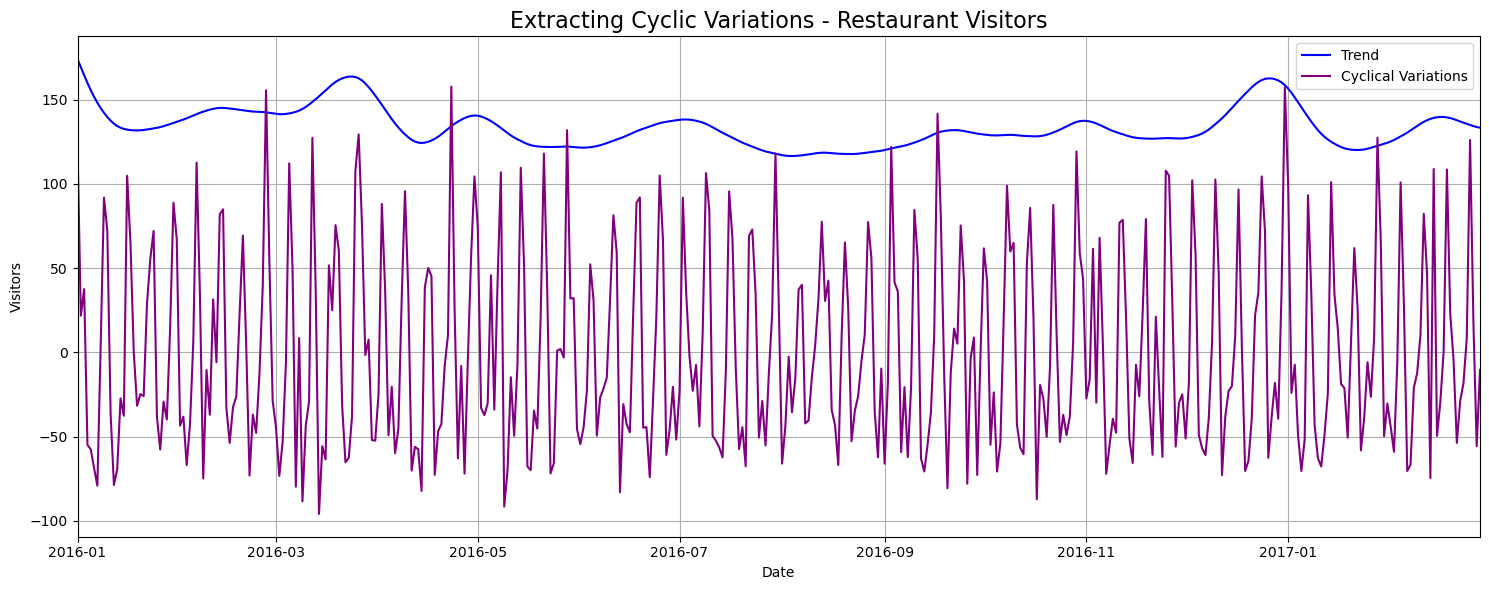

In [22]:
from statsmodels.tsa.filters.hp_filter import hpfilter

restaurant_cycle,restaurant_trend = hpfilter(restaurant_series, lamb=1600)

df['cycle'] =restaurant_cycle
df['trend'] =restaurant_trend

plt.figure(figsize=(15,6))

plt.plot(df.index, df['trend'], label='Trend', color='blue') 
plt.plot(df.index, df['cycle'], label='Cyclical Variations', color='purple')   

plt.title('Extracting Cyclic Variations - Restaurant Visitors', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Visitors')  
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2017-02-28')) # Train Dataset
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show();

In [23]:
# Perform a full search over the same grid as your manual SARIMAX model
auto_model = pm.auto_arima(
    restaurant_series,          # The time series data
    seasonal=True,              # Enable seasonal component
    m=7,                        # Seasonal period
    d=0,                        # Set differencing 
    D=0,                        # Set seasonal differencing
    start_p=0, max_p=3,         # p 
    start_q=0, max_q=3,         # q 
    start_P=0, max_P=3,         # P 
    start_Q=0, max_Q=3,         # Q 
    stepwise=False,             # Disable stepwise search (enable full grid search)
    trace=False,                # Print model search progress
    error_action='ignore',      # Ignore errors and continue
    suppress_warnings=True,     # Suppress convergence warnings
    information_criterion='aic' # Use AIC to choose the best model
)

# Print the best model found
print(f"Best model: SARIMA{auto_model.order}{auto_model.seasonal_order}")

Best model: SARIMA(0, 0, 0)(1, 0, 1, 7)


In [24]:
def combinator(items, r=1):
    combo = [i for i in product(*items, repeat=r)]  # Generate Cartesian product of input lists
    return combo                                    # Return the list of combinations


P_ns, Q_ns = [list(range(4))]*2          # Define search ranges for non-seasonal parameters (p, q): each from 0 to 3
P_s, Q_s = [list(range(4))]*2             # Define search ranges for seasonal parameters (P, Q): each from 0 to 3
d = 0
D = 0
S = 7

total = (P_ns[-1] + 1) * (Q_ns[-1] + 1) * (P_s[-1] + 1) * (Q_s[-1]+ 1)
print(f'Total number of models: {total}')

vals = combinator([P_ns, [d], Q_ns, P_s, [D], Q_s])  # Generate all combinations of SARIMA parameter sets

score = {}                                     # Dictionary to store model evaluation metrics

for i, (p, d, q, P, D, Q) in enumerate(vals):  # Iterate over all parameter combinations
    if i % 15 == 0:                            # Print progress every 15 models
        print(f'Running model #{i} using SARIMA({p},{d},{q})({P},{D},{Q},{S})')

    m = SARIMAX(restaurant_series,             # Define SARIMA model with current parameter set
                order=(p,d,q), 
                seasonal_order=(P, D, Q, S),   
                enforce_stationarity=False)    # Allow non-stationary models for broader search

    res = m.fit(disp=0, low_memory=True)       # Fit the model silently

    score[i] = {                               # Store model results and evaluation metrics
        'non-seasonal order': (p, d, q),      
        'seasonal order': (P, D, Q),
        'AIC': res.aic,                        # Akaike Information Criterion
        'AICc': res.aicc,                      # Corrected AIC
        'model': res                           # Fitted model object
    }
print()

pd.DataFrame(score).T.sort_values(by='AIC').reset_index().head()

Total number of models: 256
Running model #0 using SARIMA(0,0,0)(0,0,0,7)
Running model #15 using SARIMA(0,0,0)(3,0,3,7)
Running model #30 using SARIMA(0,0,1)(3,0,2,7)
Running model #45 using SARIMA(0,0,2)(3,0,1,7)
Running model #60 using SARIMA(0,0,3)(3,0,0,7)
Running model #75 using SARIMA(1,0,0)(2,0,3,7)
Running model #90 using SARIMA(1,0,1)(2,0,2,7)
Running model #105 using SARIMA(1,0,2)(2,0,1,7)
Running model #120 using SARIMA(1,0,3)(2,0,0,7)
Running model #135 using SARIMA(2,0,0)(1,0,3,7)
Running model #150 using SARIMA(2,0,1)(1,0,2,7)
Running model #165 using SARIMA(2,0,2)(1,0,1,7)
Running model #180 using SARIMA(2,0,3)(1,0,0,7)
Running model #195 using SARIMA(3,0,0)(0,0,3,7)
Running model #210 using SARIMA(3,0,1)(0,0,2,7)
Running model #225 using SARIMA(3,0,2)(0,0,1,7)
Running model #240 using SARIMA(3,0,3)(0,0,0,7)
Running model #255 using SARIMA(3,0,3)(3,0,3,7)



,index,non-seasonal order,seasonal order,AIC,AICc,model
0,123,"(1, 0, 3)","(2, 0, 3)",4038.724973,4039.274973,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
1,119,"(1, 0, 3)","(1, 0, 3)",4039.451656,4039.900534,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
2,103,"(1, 0, 2)","(1, 0, 3)",4047.765056,4048.122376,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
3,205,"(3, 0, 0)","(3, 0, 1)",4048.242389,4048.599709,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
4,141,"(2, 0, 0)","(3, 0, 1)",4058.122932,4058.399475,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...


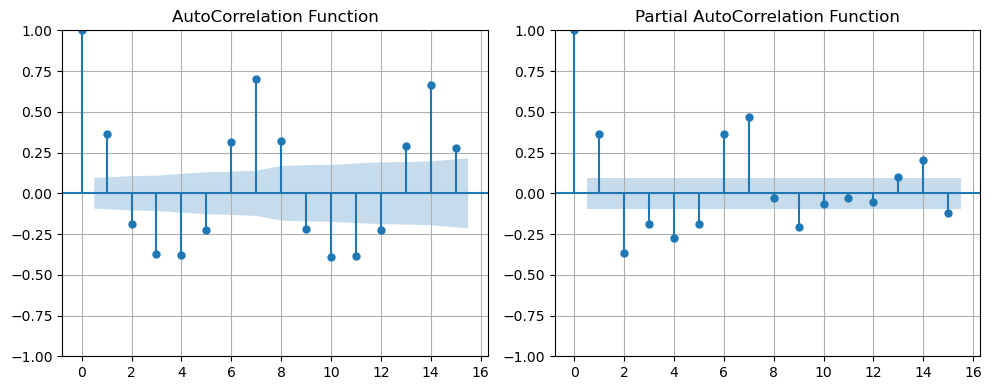

In [25]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  

# Interest Rate Data
plot_acf(restaurant_series, ax=axes[0], lags=15)
axes[0].set_title("AutoCorrelation Function", fontsize=12)
axes[0].grid(True)

# Simulated Random Walk Data
plot_pacf(restaurant_series, ax=axes[1], lags=15)
axes[1].set_title("Partial AutoCorrelation Function", fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [26]:
# Define the SARIMA (p,d,q)(P,D,Q,S) model
model_103 = SARIMAX(restaurant_series,                   # Time series data
                    order=(1, 0, 3),                     # Non-seasonal order (p,d,q)
                    seasonal_order=(2, 0, 3, 7),        # Seasonal order (P,D,Q,S)
                    enforce_stationarity=False)          # Allow non-stationary behavior

# Fit the model
model_fit_103 = model_103.fit()

# Display summary of the model
print(model_fit_103.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 3)x(2, 0, 3, 7)   Log Likelihood               -2009.362
Date:                           Wed, 16 Apr 2025   AIC                           4038.725
Time:                                   08:54:12   BIC                           4078.911
Sample:                               01-01-2016   HQIC                          4054.622
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6377      0.229      2.790      0.005       0.190       1.086
ma.L1         -0.4632      0.235     -1.972

In [27]:
# Forecast the next 'steps' time points
forecast_103 = model_fit_103.get_forecast(steps=42)

# Extract predicted mean and confidence intervals
forecast_mean_103 = forecast_103.predicted_mean
conf_int_103 = forecast_103.conf_int()

# Assign forecasts to the test DataFrame
test['Forecast103'] = forecast_mean_103.values                                # Forecast mean

test['Error103'] = test['Forecast103'] - test['total']

test['Lower 95% CI 103'] = conf_int_103.iloc[:, 0].values                      # Lower bound
test['Upper 95% CI 103'] = conf_int_103.iloc[:, 1].values                      # Upper bound

# Show the updated test DataFrame
test.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,day_of_month,month,Forecast103,Error103,Lower 95% CI 103,Upper 95% CI 103
date,,,,,,,,,,,,,,
2017-03-12,6,0,na,46,16,55,41,158,12,3,184.531452,26.531452,122.367902,246.695001
2017-03-13,0,0,na,43,24,18,13,98,13,3,99.065950,1.065950,35.962982,162.168917
2017-03-14,1,0,na,21,14,22,29,86,14,3,107.420029,21.420029,43.756171,171.083888
2017-03-15,2,0,na,12,18,21,11,62,15,3,102.117089,40.117089,38.006123,166.228055
2017-03-16,3,0,na,30,8,24,9,71,16,3,101.396265,30.396265,37.104355,165.688175


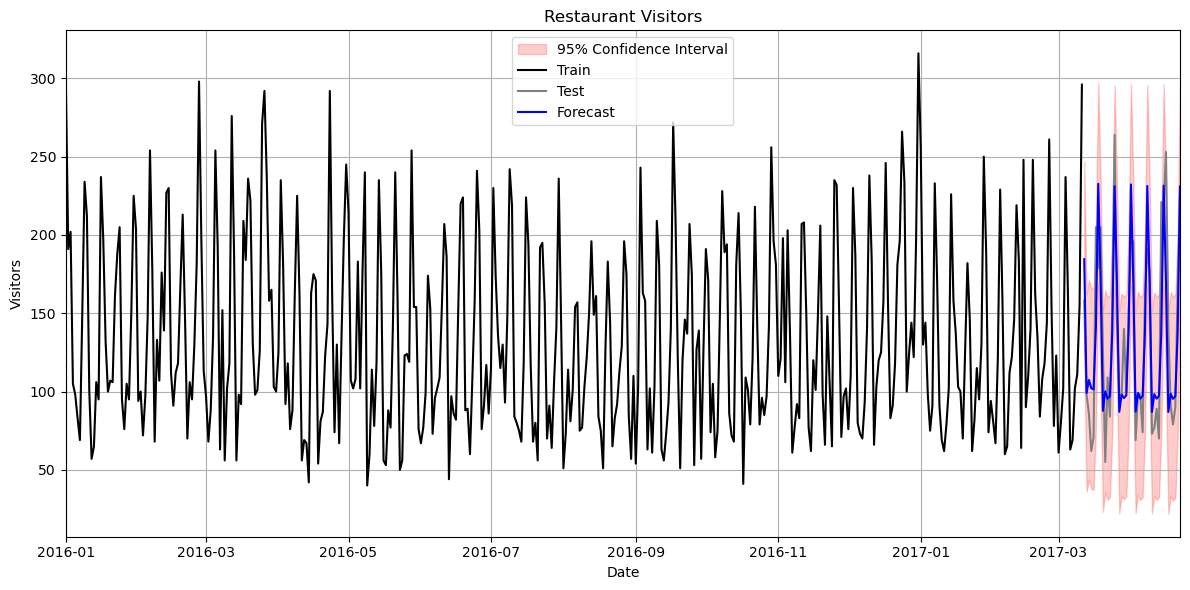

In [28]:
# Plot actual and fitted serie
plt.figure(figsize=(12, 6))                                      

# Plot 95% confidence interval
plt.fill_between(test.index,
                 conf_int_103.iloc[:, 0],     # Lower bound
                 conf_int_103.iloc[:, 1],     # Upper bound
                 color='red', alpha=0.2, label='95% Confidence Interval')

plt.plot(train.index, train['total'], label='Train', color='black')       # Train
plt.plot(test.index, test['total'], label='Test', color='gray')           # Test

plt.plot(test.index, test['Forecast103'], label='Forecast', color='blue')    # Forecast

plt.title('Restaurant Visitors')                      
plt.xlabel('Date')                                        
plt.ylabel('Visitors')  
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2017-04-22'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

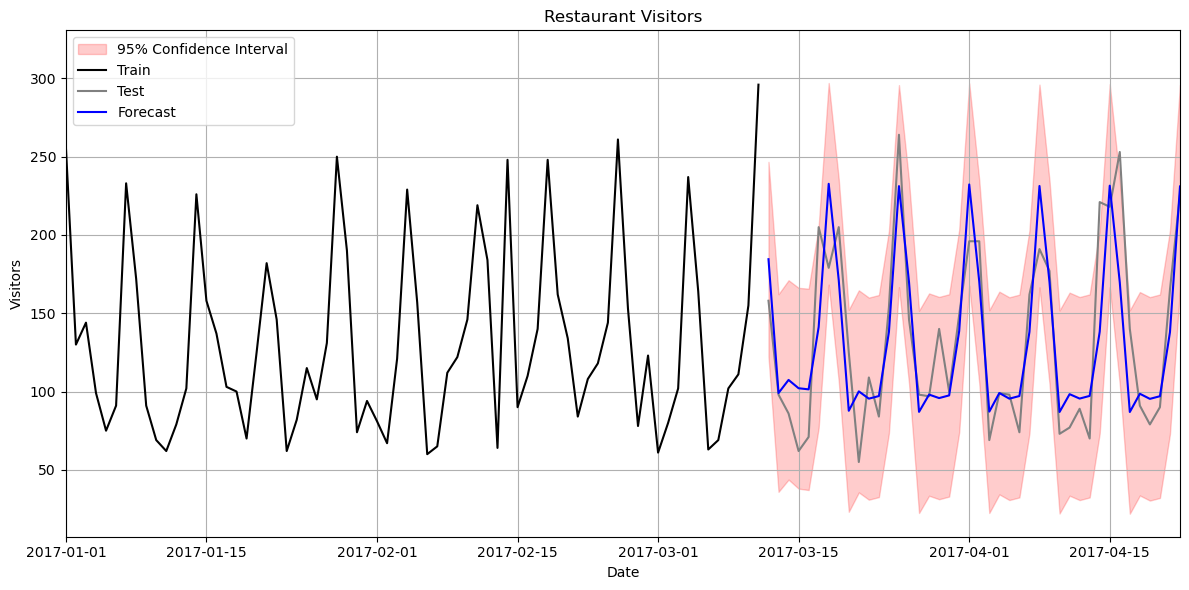

In [29]:
# Plot actual and fitted serie
plt.figure(figsize=(12, 6))                                      

# Plot 95% confidence interval
plt.fill_between(test.index,
                 conf_int_103.iloc[:, 0],     # Lower bound
                 conf_int_103.iloc[:, 1],     # Upper bound
                 color='red', alpha=0.2, label='95% Confidence Interval')

plt.plot(train.index, train['total'], label='Train', color='black')       # Train
plt.plot(test.index, test['total'], label='Test', color='gray')           # Test

plt.plot(test.index, test['Forecast103'], label='Forecast', color='blue')    # Forecast

plt.title('Restaurant Visitors')                      
plt.xlabel('Date')                                        
plt.ylabel('Visitors')  
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

In [30]:
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import (
    mean_absolute_error,              # MAE
    mean_squared_error,               # MSE
    mean_absolute_percentage_error,   # MAPE
    median_absolute_error,            # MdAE
    r2_score                          # R-squared
)

# Define true values and predictions
y_true = test['total']                      # Actual values
y_pred = test['Forecast103']                # Forecast values
errors = test['Error103']                   # Errors (y_true - y_pred)

# Compute error metrics
mae = mean_absolute_error(y_true, y_pred)               # Mean Absolute Error
mse_val = mean_squared_error(y_true, y_pred)            # Mean Squared Error
rmse_val = rmse(y_true, y_pred)                         # Root Mean Squared Error
mape_val = mean_absolute_percentage_error(y_true, y_pred) * 100  # Mean Absolute Percentage Error (%)
mdae = median_absolute_error(y_true, y_pred)            # Median Absolute Error
r2 = r2_score(y_true, y_pred)                           # R-squared

# Print all metrics
print(f"MAE:   {mae:.2f}")
print(f"MSE:   {mse_val:.2f}")
print(f"RMSE:  {rmse_val:.2f}")
print(f"MAPE:  {mape_val:.2f}%")
print(f"MdAE:  {mdae:.2f}")
print(f"R²:    {r2:.4f}")

MAE:   25.33
MSE:   1050.49
RMSE:  32.41
MAPE:  20.36%
MdAE:  22.28
R²:    0.6814


In [31]:
from statsmodels.tools.eval_measures import mse,rmse

# Calculate MAPE for each forecast
mape_sarima = (np.abs(test['Error103']) / test['total']).mean() * 100

# Display MAPE results
print(f'MAPE for SARIMA model: {mape_sarima:.2f}')

MAPE for SARIMA model: 20.36


### Now add the exog variable

In [32]:
train.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,day_of_month,month
date,,,,,,,,,,
2016-01-01,4,1,New Year's Day,65,25,67,139,296,1,1
2016-01-02,5,0,na,24,39,43,85,191,2,1
2016-01-03,6,0,na,24,31,66,81,202,3,1
2016-01-04,0,0,na,23,18,32,32,105,4,1
2016-01-05,1,0,na,2,15,38,43,98,5,1


In [33]:
exog_data = train[['weekday', 'holiday', 'day_of_month']]  # Multiple column selection
endog_data = train['total']                                # Target variable selection

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMAX model with exogenous regressors
model_M = SARIMAX(endog=endog_data, 
                    exog=exog_data, 
                    order=(1, 0, 3), 
                    seasonal_order=(2, 0, 3, 7),
                    enforce_stationarity=False)

# Fit the model
model_fit_M = model_M.fit()

# Display model summary
print(model_fit_M.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 3)x(2, 0, 3, 7)   Log Likelihood               -1950.766
Date:                           Wed, 16 Apr 2025   AIC                           3927.533
Time:                                   08:54:15   BIC                           3979.774
Sample:                               01-01-2016   HQIC                          3948.199
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
weekday         28.1230    112.751      0.249      0.803    -192.864     249.110
holiday         78.2270      4.291   

In [35]:
# Assume you already have exogenous test data for the next 42 steps
exog_test_M = test[['weekday', 'holiday', 'day_of_month']]  # Must match the structure of training exog

# Forecast the next 42 time points with exogenous inputs
forecast_M = model_fit_M.get_forecast(steps=42, exog=exog_test_M)

# Extract predicted mean and confidence intervals
forecast_mean_M = forecast_M.predicted_mean
conf_int_M = forecast_M.conf_int()

# Assign forecasts to the test DataFrame
test['ForecastM'] = forecast_mean_M.values
test['ErrorM'] = test['ForecastM'] - test['total']
test['Lower 95% CI M'] = conf_int_M.iloc[:, 0].values
test['Upper 95% CI M'] = conf_int_M.iloc[:, 1].values

# Display updated test DataFrame
test.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,day_of_month,month,Forecast103,Error103,Lower 95% CI 103,Upper 95% CI 103,ForecastM,ErrorM,Lower 95% CI M,Upper 95% CI M
date,,,,,,,,,,,,,,,,,,
2017-03-12,6,0,na,46,16,55,41,158,12,3,184.531452,26.531452,122.367902,246.695001,179.196538,21.196538,125.916165,232.476912
2017-03-13,0,0,na,43,24,18,13,98,13,3,99.065950,1.065950,35.962982,162.168917,78.025251,-19.974749,23.900343,132.150159
2017-03-14,1,0,na,21,14,22,29,86,14,3,107.420029,21.420029,43.756171,171.083888,96.913332,10.913332,42.769694,151.056971
2017-03-15,2,0,na,12,18,21,11,62,15,3,102.117089,40.117089,38.006123,166.228055,97.445326,35.445326,43.238585,151.652066
2017-03-16,3,0,na,30,8,24,9,71,16,3,101.396265,30.396265,37.104355,165.688175,95.608280,24.608280,41.394916,149.821645


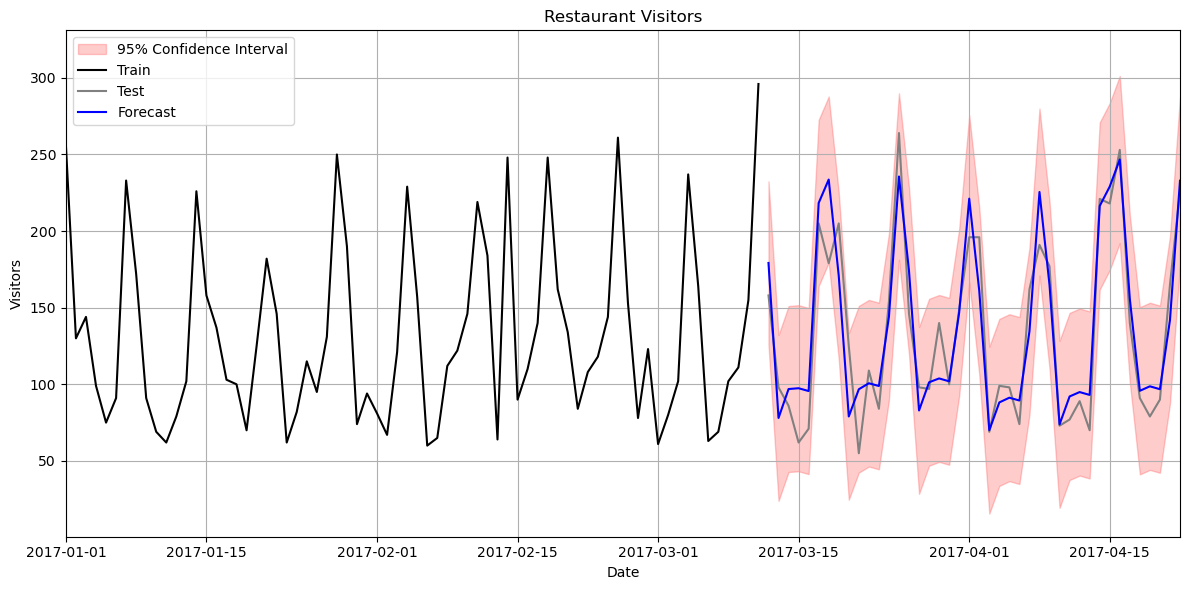

In [36]:
# Plot actual and fitted serie
plt.figure(figsize=(12, 6))                                      

# Plot 95% confidence interval
plt.fill_between(test.index,
                 conf_int_M.iloc[:, 0],     # Lower bound
                 conf_int_M.iloc[:, 1],     # Upper bound
                 color='red', alpha=0.2, label='95% Confidence Interval')

plt.plot(train.index, train['total'], label='Train', color='black')       # Train
plt.plot(test.index, test['total'], label='Test', color='gray')           # Test

plt.plot(test.index, test['ForecastM'], label='Forecast', color='blue')    # Forecast

plt.title('Restaurant Visitors')                      
plt.xlabel('Date')                                        
plt.ylabel('Visitors')  
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

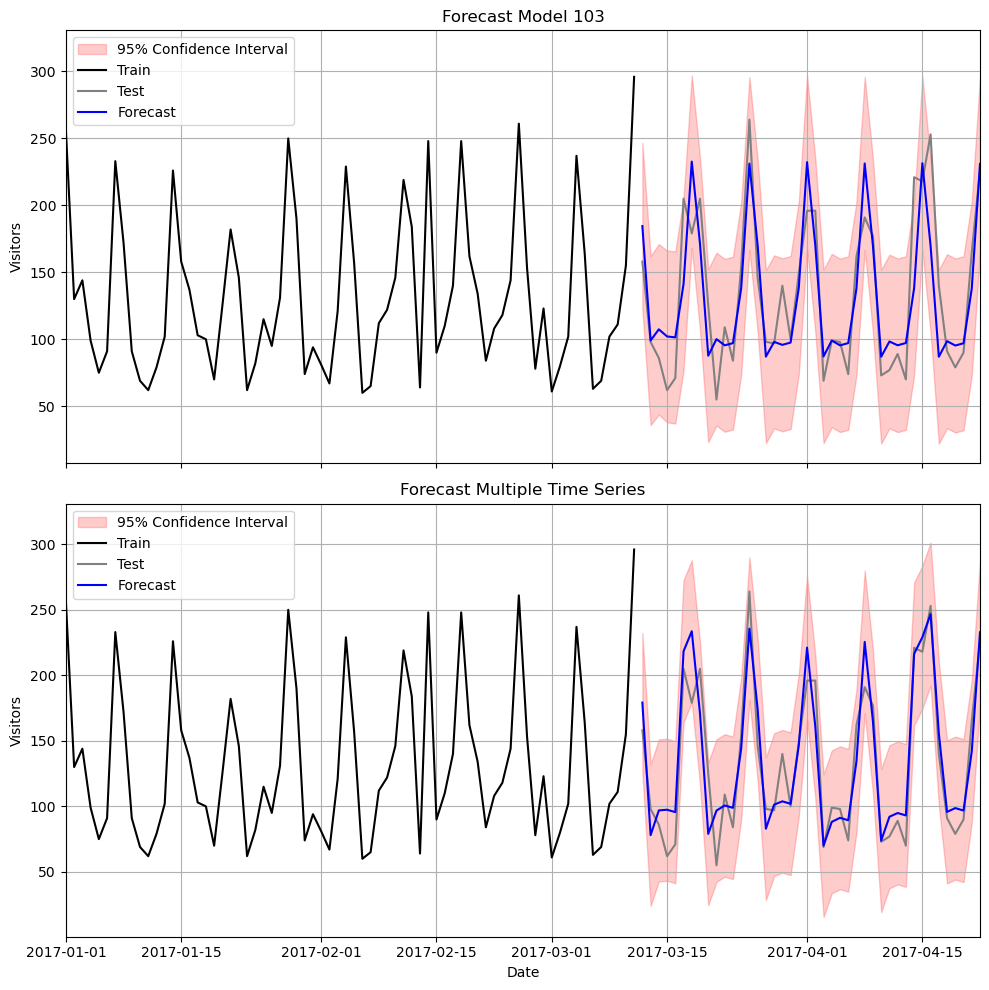

In [37]:
# Create subplots: 2 rows, 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# --- First Forecast (Forecast103) ---
axes[0].fill_between(test.index,
                     conf_int_103.iloc[:, 0],
                     conf_int_103.iloc[:, 1],
                     color='red', alpha=0.2, label='95% Confidence Interval')

axes[0].plot(train.index, train['total'], label='Train', color='black')
axes[0].plot(test.index, test['total'], label='Test', color='gray')
axes[0].plot(test.index, test['Forecast103'], label='Forecast', color='blue')

axes[0].set_title('Forecast Model 103')
axes[0].set_ylabel('Visitors')
axes[0].legend()
axes[0].grid(True)
axes[0].set_xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))

# --- Second Forecast (ForecastM) ---
axes[1].fill_between(test.index,
                     conf_int_M.iloc[:, 0],
                     conf_int_M.iloc[:, 1],
                     color='red', alpha=0.2, label='95% Confidence Interval')

axes[1].plot(train.index, train['total'], label='Train', color='black')
axes[1].plot(test.index, test['total'], label='Test', color='gray')
axes[1].plot(test.index, test['ForecastM'], label='Forecast', color='blue')

axes[1].set_title('Forecast Multiple Time Series')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Visitors')
axes[1].legend()
axes[1].grid(True)
axes[1].set_xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))

# Final layout
plt.tight_layout()
plt.show()


In [38]:
# Define true values and predictions
y_truem = test['total']                      # Actual values
y_predm = test['ForecastM']                # Forecast values
errorsm = test['ErrorM']                   # Errors (y_true - y_pred)

# Compute error metrics
maem = mean_absolute_error(y_truem, y_predm)               # Mean Absolute Error
mse_valm = mean_squared_error(y_truem, y_predm)            # Mean Squared Error
rmse_valm = rmse(y_truem, y_predm)                         # Root Mean Squared Error
mape_valm = mean_absolute_percentage_error(y_truem, y_predm) * 100  # Mean Absolute Percentage Error (%)
mdaem = median_absolute_error(y_truem, y_predm)            # Median Absolute Error
r2m = r2_score(y_truem, y_predm)                           # R-squared

# Print all metrics
print(f"MAE:   {maem:.2f}")
print(f"MSE:   {mse_valm:.2f}")
print(f"RMSE:  {rmse_valm:.2f}")
print(f"MAPE:  {mape_valm:.2f}%")
print(f"MdAE:  {mdaem:.2f}")
print(f"R²:    {r2m:.4f}")

MAE:   18.18
MSE:   504.40
RMSE:  22.46
MAPE:  15.82%
MdAE:  15.07
R²:    0.8470


In [39]:
# Metrics for Forecast103
mae_103 = mean_absolute_error(test['total'], test['Forecast103'])
mse_103 = mean_squared_error(test['total'], test['Forecast103'])
rmse_103 = rmse(test['total'], test['Forecast103'])
mape_103 = mean_absolute_percentage_error(test['total'], test['Forecast103']) * 100
mdae_103 = median_absolute_error(test['total'], test['Forecast103'])
r2_103 = r2_score(test['total'], test['Forecast103'])

# Metrics for ForecastM
mae_m = mean_absolute_error(test['total'], test['ForecastM'])
mse_m = mean_squared_error(test['total'], test['ForecastM'])
rmse_m = rmse(test['total'], test['ForecastM'])
mape_m = mean_absolute_percentage_error(test['total'], test['ForecastM']) * 100
mdae_m = median_absolute_error(test['total'], test['ForecastM'])
r2_m = r2_score(test['total'], test['ForecastM'])

# Combine into dictionaries
metrics_103 = {
    'MAE': mae_103,
    #'MSE': mse_103,
    'RMSE': rmse_103,
    'MAPE': mape_103,
    #'MdAE': mdae_103,
    #'R²': r2_103
}

metrics_M = {
    'MAE': mae_m,
    #'MSE': mse_m,
    'RMSE': rmse_m,
    'MAPE': mape_m,
    #'MdAE': mdae_m,
    #'R²': r2_m
}

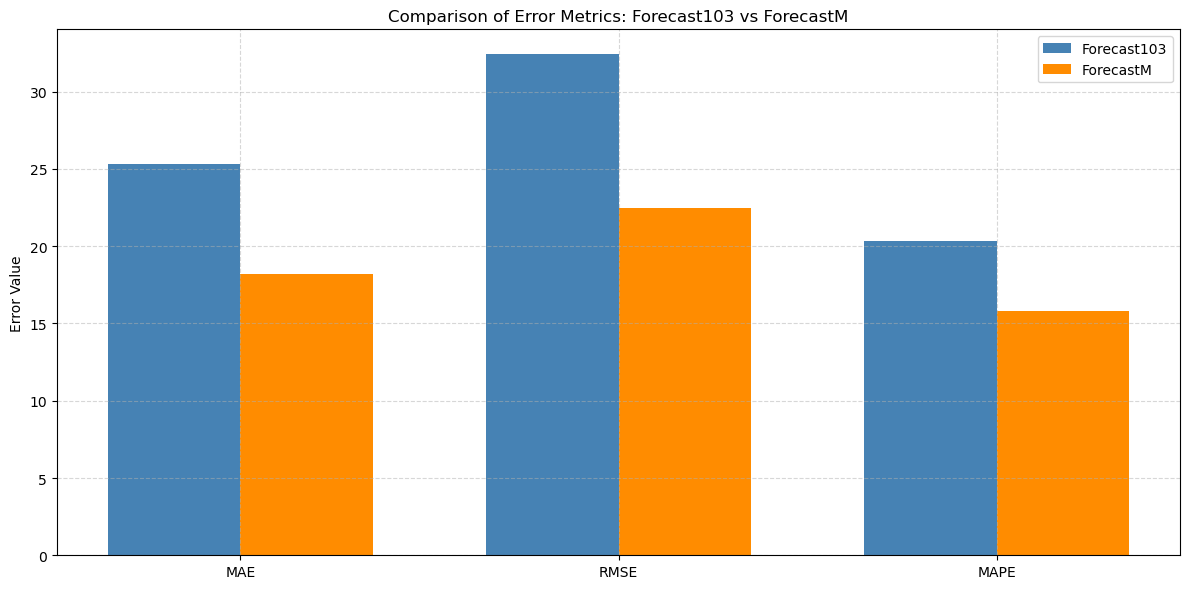

In [40]:
# Plotting
labels = list(metrics_103.keys())
values_103 = list(metrics_103.values())
values_M = list(metrics_M.values())

x = range(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - width/2 for i in x], values_103, width=width, label='Forecast103', color='steelblue')
plt.bar([i + width/2 for i in x], values_M, width=width, label='ForecastM', color='darkorange')

plt.xticks(x, labels)
plt.ylabel("Error Value")
plt.title("Comparison of Error Metrics: Forecast103 vs ForecastM")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Exogenous variables** provide extra signal that help explain variation in the target series that cannot be captured by its own past values or seasonal patterns. It reduces forecast error because reduces autocorrelation. Exogenous variable is a leading indicator, it can help anticipate future movements of the target series.